<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Config</a></span><ul class="toc-item"><li><span><a href="#Path" data-toc-modified-id="Path-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Path</a></span></li><li><span><a href="#Image-List" data-toc-modified-id="Image-List-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Image List</a></span></li></ul></li><li><span><a href="#写真を並べる" data-toc-modified-id="写真を並べる-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>写真を並べる</a></span><ul class="toc-item"><li><span><a href="#Canvas" data-toc-modified-id="Canvas-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Canvas</a></span></li><li><span><a href="#配置の開始位置を終わり位置を指定" data-toc-modified-id="配置の開始位置を終わり位置を指定-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>配置の開始位置を終わり位置を指定</a></span></li><li><span><a href="#canvas内部の一枚あたりの写真の最大幅(縦横)を指定" data-toc-modified-id="canvas内部の一枚あたりの写真の最大幅(縦横)を指定-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>canvas内部の一枚あたりの写真の最大幅(縦横)を指定</a></span></li><li><span><a href="#中心座標が配置される間隔" data-toc-modified-id="中心座標が配置される間隔-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>中心座標が配置される間隔</a></span><ul class="toc-item"><li><span><a href="#確認" data-toc-modified-id="確認-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>確認</a></span></li></ul></li></ul></li><li><span><a href="#写真をリサイズ" data-toc-modified-id="写真をリサイズ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>写真をリサイズ</a></span><ul class="toc-item"><li><span><a href="#リサイズした写真をcanvasに埋め込み" data-toc-modified-id="リサイズした写真をcanvasに埋め込み-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>リサイズした写真をcanvasに埋め込み</a></span></li><li><span><a href="#全ての写真を並べる" data-toc-modified-id="全ての写真を並べる-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>全ての写真を並べる</a></span></li></ul></li><li><span><a href="#END" data-toc-modified-id="END-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>END</a></span></li></ul></div>

## Config

In [183]:
import os, sys, pathlib
print(sys.version)
import re, pprint, copy

print()
import numpy as np
print("np         : {}".format(np.__version__))

import cv2
print("cv2        : {}".format(cv2.__version__))

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print("matplotlib : {}".format(matplotlib.__version__))

3.6.5 (default, Jan 23 2019, 14:43:22) 
[GCC 4.2.1 Compatible Apple LLVM 10.0.0 (clang-1000.10.44.4)]

np         : 1.16.0
cv2        : 4.0.0
matplotlib : 3.0.2


### Path

In [184]:
HOME_Path = pathlib.Path(os.getcwd()).parents[0]
img_Path  = HOME_Path / "img"
print("path name | exist | path\n" + 
      "========================")
print("HOME_Path | {:5} | {}".format(HOME_Path.exists(), str(HOME_Path)))
print("img_Path  | {:5} | {}".format(img_Path.exists(),  str(img_Path)))

path name | exist | path
HOME_Path |     1 | /Users/hiroaki.sugisaki/workdir/git/Learning_OpenCV_Python
img_Path  |     1 | /Users/hiroaki.sugisaki/workdir/git/Learning_OpenCV_Python/img


im.shape : (576, 768, 3)
-------------------------------
| Height  | Width   | Channel |
|     576 |     768 |       3 |
-------------------------------


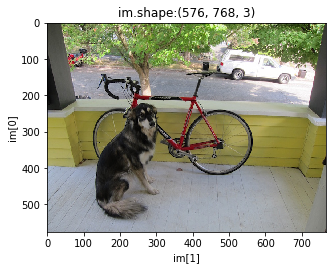

In [185]:
_filepath = str(img_Path / "dog.jpg")
im = cv2.imread(filename=_filepath)
im = cv2.cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
_h, _w, _c = im.shape
print("im.shape : {}".format(im.shape))
print("-------------------------------\n" +
      "| Height  | Width   | Channel |\n" +
      "| {:7} | {:7} | {:7} |\n".format(_h, _w, _c) +
      "-------------------------------")

########################################
fig = plt.figure(figsize=(5,5))
nrows, ncols, idx = 1, 1, 0
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)
ax.imshow(im)
ax.set_title(label="im.shape:{}".format(im.shape))
ax.set_xlabel(xlabel="im[1]")
ax.set_ylabel(ylabel="im[0]")
plt.show()

### Image List

In [186]:
all_files = [
    os.path.join(os.path.abspath(_dirpath), _filename)
    for _dirpath, _dirnames, _filenames in os.walk(str(img_Path))
    for _filename in _filenames
    if re.search(r'.*\.(png|bmp|jpg)', _filename) is not None
]

pprint.pprint(all_files)

['/Users/hiroaki.sugisaki/workdir/git/Learning_OpenCV_Python/img/dog.jpg',
 '/Users/hiroaki.sugisaki/workdir/git/Learning_OpenCV_Python/img/Pepper.bmp',
 '/Users/hiroaki.sugisaki/workdir/git/Learning_OpenCV_Python/img/Balloon.bmp',
 '/Users/hiroaki.sugisaki/workdir/git/Learning_OpenCV_Python/img/Airplane.bmp',
 '/Users/hiroaki.sugisaki/workdir/git/Learning_OpenCV_Python/img/Mandrill.bmp',
 '/Users/hiroaki.sugisaki/workdir/git/Learning_OpenCV_Python/img/couple.bmp',
 '/Users/hiroaki.sugisaki/workdir/git/Learning_OpenCV_Python/img/Parrots.bmp',
 '/Users/hiroaki.sugisaki/workdir/git/Learning_OpenCV_Python/img/Sailboat.bmp',
 '/Users/hiroaki.sugisaki/workdir/git/Learning_OpenCV_Python/img/Aerial.bmp',
 '/Users/hiroaki.sugisaki/workdir/git/Learning_OpenCV_Python/img/milkdrop.bmp',
 '/Users/hiroaki.sugisaki/workdir/git/Learning_OpenCV_Python/img/Girl.bmp',
 '/Users/hiroaki.sugisaki/workdir/git/Learning_OpenCV_Python/img/Earth.bmp',
 '/Users/hiroaki.sugisaki/workdir/git/Learning_OpenCV_Python

In [187]:
images_list = []
for file_path in all_files:
    im = cv2.imread(file_path)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    print("| file name | {:>15} || shape | {} |".format(os.path.basename(file_path), im.shape))
    images_list.append(im)

| file name |         dog.jpg || shape | (576, 768, 3) |
| file name |      Pepper.bmp || shape | (256, 256, 3) |
| file name |     Balloon.bmp || shape | (256, 256, 3) |
| file name |    Airplane.bmp || shape | (256, 256, 3) |
| file name |    Mandrill.bmp || shape | (256, 256, 3) |
| file name |      couple.bmp || shape | (256, 256, 3) |
| file name |     Parrots.bmp || shape | (256, 256, 3) |
| file name |    Sailboat.bmp || shape | (256, 256, 3) |
| file name |      Aerial.bmp || shape | (256, 256, 3) |
| file name |    milkdrop.bmp || shape | (256, 256, 3) |
| file name |        Girl.bmp || shape | (256, 256, 3) |
| file name |       Earth.bmp || shape | (256, 256, 3) |
| file name |       Lenna.bmp || shape | (256, 256, 3) |


## 写真を並べる

OpenCV は一般的な左下原点とは異なる左上原点である. [OpenCVとOpenGLの座標系：おじさんブログ：So-netブログ](https://kazunori-ohmori.blog.so-net.ne.jp/2014-02-04)

### Canvas

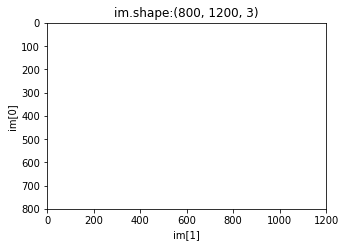

In [200]:
# Canvasを用意
canvas_w, canvas_h = 1200, 800
canvas = np.full(shape=(canvas_h, canvas_w, 3), fill_value=255)

########################################
im = copy.deepcopy(canvas)
fig = plt.figure(figsize=(5,5))
nrows, ncols, idx = 1, 1, 0
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)
ax.imshow(im)
ax.set_title(label="im.shape:{}".format(im.shape))
ax.set_xlabel(xlabel="im[1]")
ax.set_ylabel(ylabel="im[0]")
plt.show()

### 配置の開始位置を終わり位置を指定

In [201]:
# 配置の開始位置を終わり位置を指定
start_coordinate = np.array([canvas_h - 50, 50])   # 左下
end_coordinate   = np.array([50, canvas_w - 50])  # 右上
print(start_coordinate)
print(end_coordinate)

[750  50]
[  50 1150]


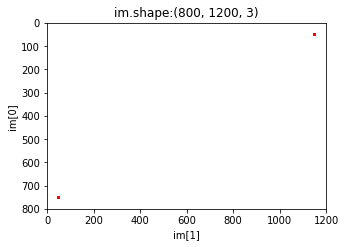

In [202]:
########################################
im = copy.deepcopy(canvas)
fig = plt.figure(figsize=(5,5))
nrows, ncols, idx = 1, 1, 0
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)

_square = 5
_color = (255, 0, 0)  # RGB
x,y = start_coordinate
im[x-_square:x+_square, y-_square:y+_square, :] = _color
x,y = end_coordinate
im[x-_square:x+_square, y-_square:y+_square, :] = _color

ax.imshow(im)

ax.set_title(label="im.shape:{}".format(im.shape))
ax.set_xlabel(xlabel="im[1]")
ax.set_ylabel(ylabel="im[0]")
plt.show()

### canvas内部の一枚あたりの写真の最大幅(縦横)を指定

In [203]:
# canvas内部の一枚あたりの写真の最大幅(縦横)を指定

# 縦横比率はcanvasに合わせ,canvasの1/3とする
image_w, image_h = int(canvas_w/3), int(canvas_h/3)
print(image_w, image_h)

400 266


### 中心座標が配置される間隔

In [204]:
# 写真の枚数
images_num = len(images_list)
# 中心座標が配置される間隔
images_center_interval_w = int((end_coordinate[1] - start_coordinate[1] - image_w) / (images_num - 1))
images_center_interval_h = int((start_coordinate[0] - end_coordinate[0] - image_h) / (images_num - 1))

print("各写真同士の中心座標間隔\n" +
      "| width  | {}".format(images_center_interval_w) + "\n" +
      "| height | {}".format(images_center_interval_h))

各写真同士の中心座標間隔
| width  | 58
| height | 36


#### 確認

In [205]:
center_coordinates = []
_tmp1 = start_coordinate + np.array([-1, 1]) * np.array([image_h, image_w], dtype=np.int) // 2 + (1-1) * np.array([-1, 1]) * np.array([images_center_interval_h, images_center_interval_w], dtype=np.int)
#_tmp1 = _tmp1.astype(np.int)
print("{:>3}枚目の写真の中心座標 : {}".format(1, _tmp1))
center_coordinates.append(_tmp1)
for i in range( 1,images_num):
    _tmp = _tmp1 + i * np.array([-1, 1]) * np.array([images_center_interval_h, images_center_interval_w], dtype=np.int)
    #_tmp2 = _tmp2.astype(np.int)
    print("{:>3}枚目の写真の中心座標 : {}".format(i+1, _tmp))
    center_coordinates.append(_tmp)

  1枚目の写真の中心座標 : [617 250]
  2枚目の写真の中心座標 : [581 308]
  3枚目の写真の中心座標 : [545 366]
  4枚目の写真の中心座標 : [509 424]
  5枚目の写真の中心座標 : [473 482]
  6枚目の写真の中心座標 : [437 540]
  7枚目の写真の中心座標 : [401 598]
  8枚目の写真の中心座標 : [365 656]
  9枚目の写真の中心座標 : [329 714]
 10枚目の写真の中心座標 : [293 772]
 11枚目の写真の中心座標 : [257 830]
 12枚目の写真の中心座標 : [221 888]
 13枚目の写真の中心座標 : [185 946]


617 250
581 308
545 366
509 424
473 482
437 540
401 598
365 656
329 714
293 772
257 830
221 888
185 946


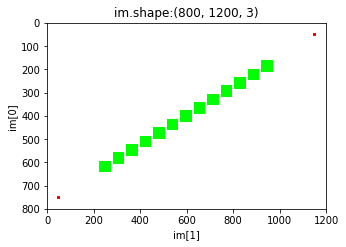

In [206]:
########################################
im = copy.deepcopy(canvas)
fig = plt.figure(figsize=(5,5))
nrows, ncols, idx = 1, 1, 0
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)

_square = 5
_color = (255, 0, 0)  # RGB
y, x  = start_coordinate
im[y-_square:y+_square, x-_square:x+_square, :] = _color
y, x  = end_coordinate
im[y-_square:y+_square, x-_square:x+_square, :] = _color

_square = 25
_color = (0, 255, 0)  # RGB
for (y,x) in center_coordinates:
    print(y,x)
    im[y-_square:y+_square, x-_square:x+_square, :] = _color

ax.imshow(im)

ax.set_title(label="im.shape:{}".format(im.shape))
ax.set_xlabel(xlabel="im[1]")
ax.set_ylabel(ylabel="im[0]")
plt.show()

## 写真をリサイズ

In [219]:
# image_w, image_h に収まるようにリサイズする

def resize_image(image, frame_width, frame_height):
    """
    width, height の中に収まり,かつ比率を変えないようにリサイズする.
    """
    im = copy.deepcopy(image)
    im_h, im_w = im.shape[0], im.shape[1]

    new_w = int(im_w * min(frame_width/im_w, frame_height/im_h))
    new_h = int(im_h * min(frame_width/im_w, frame_height/im_h))

    resized_image = cv2.resize(im, (new_w,new_h), interpolation = cv2.INTER_CUBIC)
    return resized_image

In [220]:
resized_image = resize_image(image=images_list[0], frame_width=image_w, frame_height=image_h)
print("resized_image.shape : {}".format(resized_image.shape))

resized_image.shape : (266, 354, 3)


### リサイズした写真をcanvasに埋め込み

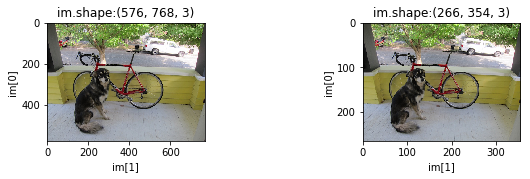

In [214]:
########################################
fig = plt.figure(figsize=(10,5))
nrows, ncols, idx = 2, 2, 0

idx += 1
ax = fig.add_subplot(nrows, ncols, idx)
im = copy.deepcopy(images_list[0])
ax.imshow(im)
ax.set_title(label="im.shape:{}".format(im.shape))
ax.set_xlabel(xlabel="im[1]")
ax.set_ylabel(ylabel="im[0]")

idx += 1
ax = fig.add_subplot(nrows, ncols, idx)
im = copy.deepcopy(resized_image)
ax.imshow(im)
ax.set_title(label="im.shape:{}".format(im.shape))
ax.set_xlabel(xlabel="im[1]")
ax.set_ylabel(ylabel="im[0]")

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

617 250


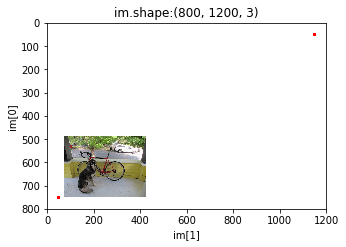

In [216]:
########################################
im = copy.deepcopy(canvas)
fig = plt.figure(figsize=(5,5))
nrows, ncols, idx = 1, 1, 0
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)

_square = 5
_color = (255, 0, 0)  # RGB
y, x  = start_coordinate
im[y-_square:y+_square, x-_square:x+_square, :] = _color
y, x  = end_coordinate
im[y-_square:y+_square, x-_square:x+_square, :] = _color

y,x = center_coordinates[0]
y_width, x_width, _ = resized_image.shape
print(y,x)
im[y-int(y_width/2):y+int(y_width/2), x-int(x_width/2):x+int(x_width/2), :] = resized_image

ax.imshow(im)

ax.set_title(label="im.shape:{}".format(im.shape))
ax.set_xlabel(xlabel="im[1]")
ax.set_ylabel(ylabel="im[0]")
plt.show()

### 全ての写真を並べる

In [221]:
resized_images_list = [resize_image(image=image, frame_width=image_w, frame_height=image_h) for image in images_list]

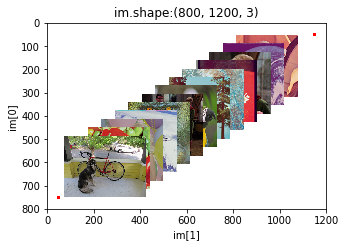

In [222]:
########################################
im = copy.deepcopy(canvas)
fig = plt.figure(figsize=(5,5))
nrows, ncols, idx = 1, 1, 0
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)

_square = 5
_color = (255, 0, 0)  # RGB
y, x  = start_coordinate
im[y-_square:y+_square, x-_square:x+_square, :] = _color
y, x  = end_coordinate
im[y-_square:y+_square, x-_square:x+_square, :] = _color

for (y,x), re_im in zip(center_coordinates[::-1], resized_images_list[::-1]):
    y_width, x_width, _ = re_im.shape
    im[y-int(y_width/2):y+int(y_width/2), x-int(x_width/2):x+int(x_width/2), :] = re_im

ax.imshow(im)

ax.set_title(label="im.shape:{}".format(im.shape))
ax.set_xlabel(xlabel="im[1]")
ax.set_ylabel(ylabel="im[0]")
plt.show()

## END